# Data Preparation
In this section, I prepare the data that is to be used for this analysis so that it is suitable for the project scope. 


In [1]:
# Import libraries
import pandas as pd

In [2]:
# Load the training data
train_df = pd.read_csv('../Data/train_data.csv')

In [3]:
# Load the test dataset
test_df = pd.read_csv('../Data/test_data.csv')

In [4]:
#Display first few rows
train_df.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [5]:
test_df.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


In [6]:
# check for the missing values in the train dataset
train_df.isnull().sum()

Name of the product     0
Product Brand           0
categories              0
primaryCategories       0
reviews.date            0
reviews.text            0
reviews.title          10
sentiment               0
dtype: int64

There are 10 missing values in the reviews title, that is a small amount of data to deal with. 
Since I have enough datasets for this, I will not struglle much, but just drop the missing values


In [7]:
train_df.dropna(inplace=True)

In [8]:
train_df.isnull().sum()

Name of the product    0
Product Brand          0
categories             0
primaryCategories      0
reviews.date           0
reviews.text           0
reviews.title          0
sentiment              0
dtype: int64

# EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

In [10]:
# Univariate analysis of the data
train_df.describe()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
count,3990,3990,3990,3990,3990,3990,3990,3990
unique,23,1,23,4,630,3590,2606,3
top,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-23T00:00:00.000Z,I bought this kindle for my 11yr old granddaug...,Great tablet,Positive
freq,667,3990,628,2599,99,4,100,3739


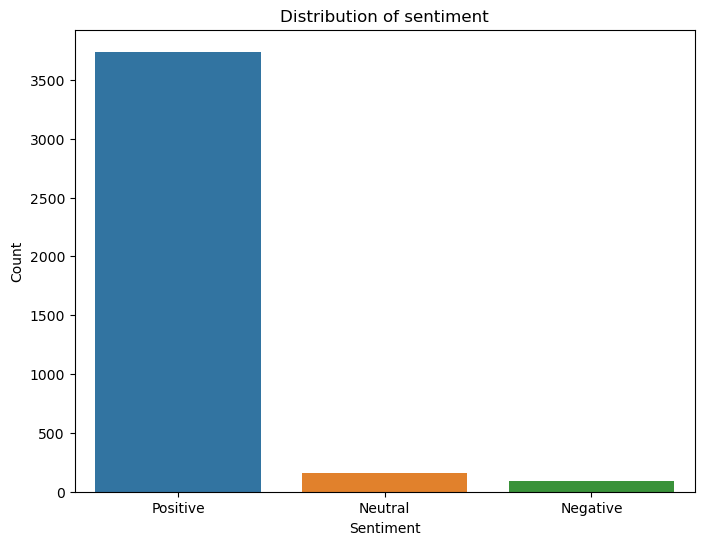

In [11]:
# Distibution of sentiment
plt.figure(figsize=(8,6))
sns.countplot(x = 'sentiment', data = train_df)
plt.title("Distribution of sentiment")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

most of the sentiments in the data are positive

In [12]:
train_df['polarity'] = train_df['reviews.text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
train_df['subjectivity'] = train_df['reviews.text'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

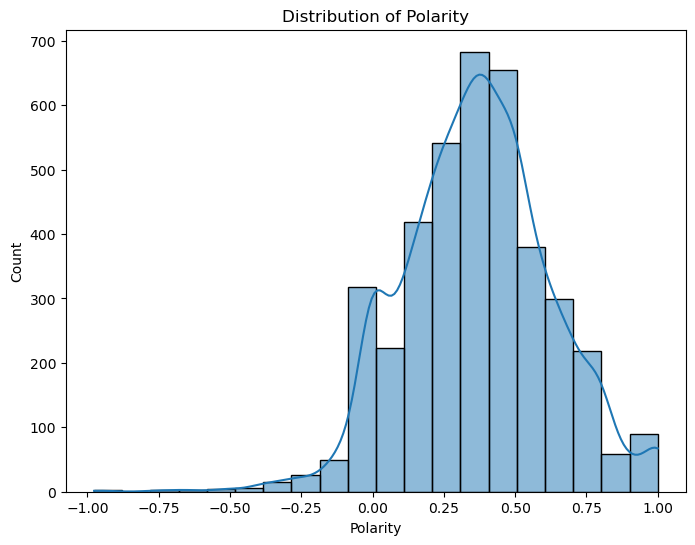

In [13]:
# Distribution of polarity
plt.figure(figsize = (8,6))
sns.histplot(train_df['polarity'], bins=20, kde=True)
plt.title('Distribution of Polarity')
plt.xlabel("Polarity")
plt.ylabel("Count")
plt.show()

Most of the polarity tendes to +1

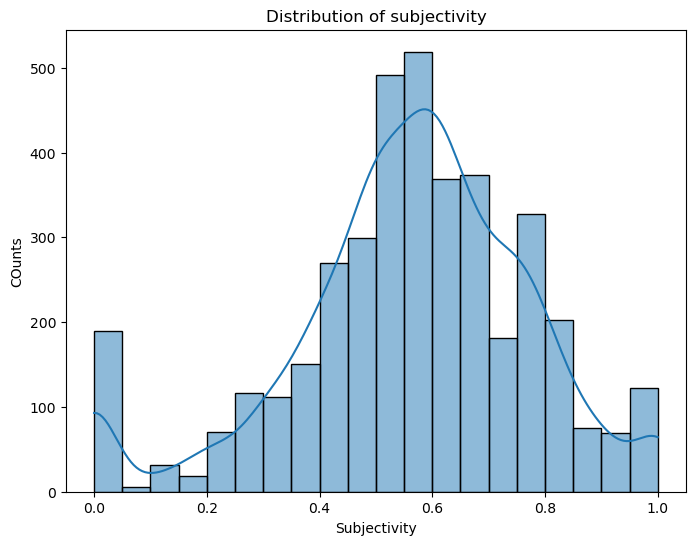

In [14]:
# Distribution of subjectivity
plt.figure(figsize=(8,6))
sns.histplot(train_df['subjectivity'], bins=20, kde=True)
plt.title('Distribution of subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('COunts')
plt.show()

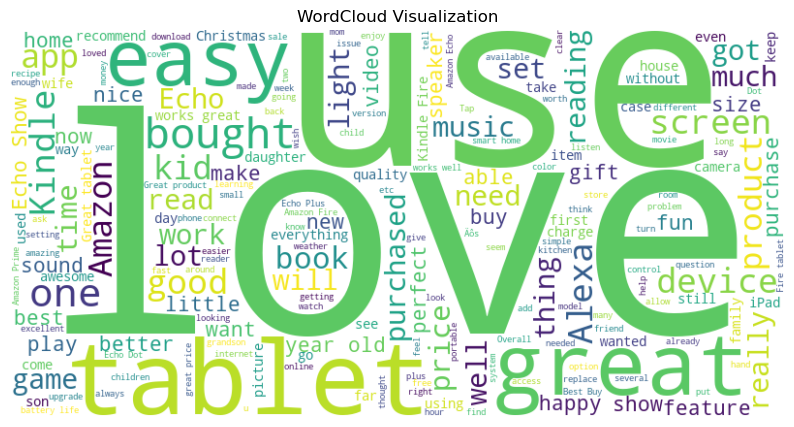

In [15]:
# WordCloud Visualization
text = ' '.join(train_df['reviews.text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud Visualization')
plt.axis('off')
plt.show()

# Feature Engineering

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
# Innitialize
tfidf_vectorizer = TfidfVectorizer()

In [18]:
# Fit and transform the review to tf-idf scores
tfidf_scores = tfidf_vectorizer.fit_transform(train_df['reviews.text'])

In [19]:
tfidf_df = pd.DataFrame(tfidf_scores.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [20]:
tfidf_df.head()

,00,10,100,1000,1000s,1080,10th,10x,11,11yr,...,äù,äú,äúalexa,äúbest,äúdropping,äúdual,äúshow,äúskills,äústar,äúthings
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
